In [16]:
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunctions
import clicfast2023.analysis.data_loader as data_loader
datdir = '/home/thirono/cernbox/clicfast2022/check_ThScan_Wr'

## get flist

In [26]:
flist =[]
for fname in np.sort(os.listdir(datdir)):
    if fname[-7:] == 'scan.h5':
        flist.append(fname)
for i, fname in enumerate(flist):
    print(i, fname)

0 20240604_103725_th_scan.h5
1 20240604_105749_th_scan.h5
2 20240604_110801_th_scan.h5
3 20240604_111204_th_scan.h5
4 20240604_111726_th_scan.h5
5 20240604_112108_th_scan.h5
6 20240604_112727_th_scan.h5
7 20240604_113904_th_scan.h5
8 20240604_115017_th_scan.h5
9 20240604_115138_th_scan.h5
10 20240604_122258_th_scan.h5
11 20240604_122754_th_scan.h5
12 20240604_131900_th_scan.h5
13 20240604_140900_th_scan.h5
14 20240604_141402_th_scan.h5
15 20240604_141806_th_scan.h5


## load data and get scruve

### fixed step

In [3]:

importlib.reload(data_loader)
importlib.reload(fitfunctions)

fname = flist[0]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param = data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret, scurves = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:28,426 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_103725_th_hit.h5
2024-06-04 14:11:28,553 - root - [INFO    ] (MainThread) 0.12s hit=86261/86261 event=86261 ts=112300/112300
2024-06-04 14:11:28,554 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_103725_th_hit.h5
2024-06-04 14:11:28,572 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 116


0.81s 768236/768236 hit=86261 ts=112300 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_103725_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:28,629 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 117
2024-06-04 14:11:28,717 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 114
2024-06-04 14:11:28,750 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 117
2024-06-04 14:11:28,784 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 115
2024-06-04 14:11:28,817 - root - [INFO    ] (MainThread) pix=(1, 11) (5, 11, 1) 118
2024-06-04 14:11:28,849 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 116
2024-06-04 14:11:28,881 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 119


In [4]:
######## auto

fname = flist[1]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret_auto, scurves_auto = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

###### auto wait 3s when it is negative step

fname = flist[2]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret_3s, scurves_3s = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)



###### fixed again, be sure to reset FPGA

fname = flist[3]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret1, scurves1 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

###### fixed again, without resetting FPGA
fname = flist[4]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret2, scurves2 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)


2024-06-04 14:11:28,923 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_105749_th_hit.h5
2024-06-04 14:11:28,934 - root - [INFO    ] (MainThread) 0.00s hit=7060/7060 event=7060 ts=17800/17800
2024-06-04 14:11:28,935 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_105749_th_hit.h5
2024-06-04 14:11:28,952 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 18
2024-06-04 14:11:28,985 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 18
2024-06-04 14:11:29,018 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 19
2024-06-04 14:11:29,050 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 15
2024-06-04 14:11:29,081 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 15
2024-06-04 14:11:29,113 - root - [INFO    ] (MainThread) pix=(1, 11) (5, 11, 1) 17


0.00s 88707/88707 hit=7060 ts=17800 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_105749_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:29,146 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 19
2024-06-04 14:11:29,177 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 20
2024-06-04 14:11:29,212 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_110801_th_hit.h5
2024-06-04 14:11:29,216 - root - [INFO    ] (MainThread) 0.00s hit=6999/6999 event=6999 ts=18600/18600
2024-06-04 14:11:29,217 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_110801_th_hit.h5
2024-06-04 14:11:29,230 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 16
2024-06-04 14:11:29,262 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 16
2024-06-04 14:11:29,293 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 19
2024-06-04 14:11:29,324 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 18
2024-06-04 14:11:29,356 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 17
2024-06-04 14:

0.00s 90804/90804 hit=6999 ts=18600 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_110801_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:29,420 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 19
2024-06-04 14:11:29,451 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 18
2024-06-04 14:11:29,537 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111204_th_hit.h5
2024-06-04 14:11:29,542 - root - [INFO    ] (MainThread) 0.00s hit=6872/6872 event=6872 ts=36500/36500
2024-06-04 14:11:29,542 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111204_th_hit.h5
2024-06-04 14:11:29,556 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 18
2024-06-04 14:11:29,587 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 17
2024-06-04 14:11:29,619 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 19
2024-06-04 14:11:29,652 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 17
2024-06-04 14:11:29,684 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 18
2024-06-04 14:

0.00s 143875/143875 hit=6872 ts=36500 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111204_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:29,746 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 18
2024-06-04 14:11:29,778 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 20
2024-06-04 14:11:29,813 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111726_th_hit.h5
2024-06-04 14:11:29,817 - root - [INFO    ] (MainThread) 0.00s hit=6069/6069 event=6069 ts=36800/36800
2024-06-04 14:11:29,818 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111726_th_hit.h5
2024-06-04 14:11:29,832 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 18
2024-06-04 14:11:29,863 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 16
2024-06-04 14:11:29,895 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 15
2024-06-04 14:11:29,927 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 16
2024-06-04 14:11:29,959 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 18
2024-06-04 14:

0.00s 140752/140752 hit=6069 ts=36800 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_111726_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:30,023 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 17
2024-06-04 14:11:30,054 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 17


### with resetting FPGA

In [5]:
fname = flist[5]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret3, scurves3 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:30,095 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th_hit.h5
2024-06-04 14:11:30,100 - root - [INFO    ] (MainThread) 0.00s hit=7011/7011 event=7011 ts=38000/38000
2024-06-04 14:11:30,100 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th_hit.h5
2024-06-04 14:11:30,114 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 15
2024-06-04 14:11:30,146 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 17
2024-06-04 14:11:30,178 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 17
2024-06-04 14:11:30,210 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 18
2024-06-04 14:11:30,242 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 18
2024-06-04 14:11:30,274 - root - [INFO    ] (MainThread) pix=(1, 11) (5, 11, 1) 17


0.00s 149067/149067 hit=7011 ts=38000 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:30,305 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 20
2024-06-04 14:11:30,337 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 19


### col comp None

In [6]:
fname = flist[5]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retNone, scurvesNone = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:30,449 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th_hit.h5
2024-06-04 14:11:30,453 - root - [INFO    ] (MainThread) 0.00s hit=7011/7011 event=7011 ts=38000/38000
2024-06-04 14:11:30,453 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th_hit.h5
2024-06-04 14:11:30,466 - root - [INFO    ] (MainThread) pix=(1, 11) (0, 11, 1) 15
2024-06-04 14:11:30,498 - root - [INFO    ] (MainThread) pix=(1, 11) (1, 11, 1) 17
2024-06-04 14:11:30,532 - root - [INFO    ] (MainThread) pix=(1, 11) (2, 11, 1) 17
2024-06-04 14:11:30,571 - root - [INFO    ] (MainThread) pix=(1, 11) (3, 11, 1) 18
2024-06-04 14:11:30,603 - root - [INFO    ] (MainThread) pix=(1, 11) (4, 11, 1) 18
2024-06-04 14:11:30,635 - root - [INFO    ] (MainThread) pix=(1, 11) (5, 11, 1) 17


0.00s 149067/149067 hit=7011 ts=38000 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112108_th
('scan_param_id', 'timestamp', 'inj', 'tdac', 'comps', 'cols')
['tdac', 'comps', 'cols'] [(0, 11, 1) (1, 11, 1) (2, 11, 1) (3, 11, 1) (4, 11, 1) (5, 11, 1)
 (6, 11, 1) (7, 11, 1)]


2024-06-04 14:11:30,666 - root - [INFO    ] (MainThread) pix=(1, 11) (6, 11, 1) 20
2024-06-04 14:11:30,699 - root - [INFO    ] (MainThread) pix=(1, 11) (7, 11, 1) 19


### comp col None, auto w/o reset

In [7]:
fname = flist[6]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retNoneAuto, scurvesNoneAuto = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:30,738 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112727_th_hit.h5
2024-06-04 14:11:30,742 - root - [INFO    ] (MainThread) 0.00s hit=6912/6912 event=6912 ts=17600/17600
2024-06-04 14:11:30,743 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112727_th_hit.h5
2024-06-04 14:11:30,757 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 16
2024-06-04 14:11:30,789 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 15
2024-06-04 14:11:30,820 - root - [INFO    ] (MainThread) pix=(1, 11) (2,) 18
2024-06-04 14:11:30,852 - root - [INFO    ] (MainThread) pix=(1, 11) (3,) 18
2024-06-04 14:11:30,884 - root - [INFO    ] (MainThread) pix=(1, 11) (4,) 18
2024-06-04 14:11:30,916 - root - [INFO    ] (MainThread) pix=(1, 11) (5,) 18


0.00s 87372/87372 hit=6912 ts=17600 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_112727_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 14:11:30,946 - root - [INFO    ] (MainThread) pix=(1, 11) (6,) 20
2024-06-04 14:11:30,977 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 15


### comp col None, auto w/o reset again

In [8]:
fname = flist[7]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retNoneAuto2, scurvesNoneAuto2 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:31,015 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_113904_th_hit.h5
2024-06-04 14:11:31,019 - root - [INFO    ] (MainThread) 0.00s hit=7052/7052 event=7052 ts=16700/16700
2024-06-04 14:11:31,019 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_113904_th_hit.h5
2024-06-04 14:11:31,033 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 14
2024-06-04 14:11:31,064 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 15
2024-06-04 14:11:31,094 - root - [INFO    ] (MainThread) pix=(1, 11) (2,) 17
2024-06-04 14:11:31,126 - root - [INFO    ] (MainThread) pix=(1, 11) (3,) 19
2024-06-04 14:11:31,158 - root - [INFO    ] (MainThread) pix=(1, 11) (4,) 18
2024-06-04 14:11:31,188 - root - [INFO    ] (MainThread) pix=(1, 11) (5,) 19


0.00s 85363/85363 hit=7052 ts=16700 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_113904_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 14:11:31,286 - root - [INFO    ] (MainThread) pix=(1, 11) (6,) 13
2024-06-04 14:11:31,315 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 17


### fixed then auto without reset

In [9]:
fname = flist[9]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retNoneAuto3, scurvesNoneAuto3 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:31,355 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_115138_th_hit.h5
2024-06-04 14:11:31,359 - root - [INFO    ] (MainThread) 0.00s hit=6896/6896 event=6896 ts=17200/17200
2024-06-04 14:11:31,359 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_115138_th_hit.h5
2024-06-04 14:11:31,372 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 15
2024-06-04 14:11:31,404 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 17
2024-06-04 14:11:31,435 - root - [INFO    ] (MainThread) pix=(1, 11) (2,) 18
2024-06-04 14:11:31,467 - root - [INFO    ] (MainThread) pix=(1, 11) (3,) 19
2024-06-04 14:11:31,497 - root - [INFO    ] (MainThread) pix=(1, 11) (4,) 19
2024-06-04 14:11:31,528 - root - [INFO    ] (MainThread) pix=(1, 11) (5,) 20


0.00s 86086/86086 hit=6896 ts=17200 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_115138_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 14:11:31,558 - root - [INFO    ] (MainThread) pix=(1, 11) (6,) 15
2024-06-04 14:11:31,588 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 17


### power cycle and reset FPGA auto

In [10]:
fname = flist[10]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
retpw, scurvespw = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:31,627 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122258_th_hit.h5
2024-06-04 14:11:31,631 - root - [INFO    ] (MainThread) 0.00s hit=6595/6595 event=6595 ts=17600/17600
2024-06-04 14:11:31,631 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122258_th_hit.h5
2024-06-04 14:11:31,645 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 16
2024-06-04 14:11:31,676 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 15
2024-06-04 14:11:31,706 - root - [INFO    ] (MainThread) pix=(1, 11) (2,) 16
2024-06-04 14:11:31,737 - root - [INFO    ] (MainThread) pix=(1, 11) (3,) 17
2024-06-04 14:11:31,769 - root - [INFO    ] (MainThread) pix=(1, 11) (4,) 17
2024-06-04 14:11:31,801 - root - [INFO    ] (MainThread) pix=(1, 11) (5,) 19


0.00s 85780/85780 hit=6595 ts=17600 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122258_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 14:11:31,831 - root - [INFO    ] (MainThread) pix=(1, 11) (6,) 19
2024-06-04 14:11:31,873 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 16


### reset and fixed

In [11]:
fname = flist[11]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret4, scurves4 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:31,914 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122754_th_hit.h5
2024-06-04 14:11:31,918 - root - [INFO    ] (MainThread) 0.00s hit=6046/6046 event=6046 ts=37000/37000
2024-06-04 14:11:31,919 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122754_th_hit.h5
2024-06-04 14:11:31,932 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 16
2024-06-04 14:11:31,964 - root - [INFO    ] (MainThread) pix=(1, 11) (1,) 17
2024-06-04 14:11:31,995 - root - [INFO    ] (MainThread) pix=(1, 11) (2,) 16
2024-06-04 14:11:32,027 - root - [INFO    ] (MainThread) pix=(1, 11) (3,) 15


0.00s 141247/141247 hit=6046 ts=37000 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_122754_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,)]


2024-06-04 14:11:32,125 - root - [INFO    ] (MainThread) pix=(1, 11) (4,) 17
2024-06-04 14:11:32,157 - root - [INFO    ] (MainThread) pix=(1, 11) (5,) 18
2024-06-04 14:11:32,186 - root - [INFO    ] (MainThread) pix=(1, 11) (6,) 17
2024-06-04 14:11:32,217 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 18


### after ~1hr w/ reset,  only tdac 7,0

In [12]:
fname = flist[12]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret5, scurves5 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:32,255 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_131900_th_hit.h5
2024-06-04 14:11:32,260 - root - [INFO    ] (MainThread) 0.00s hit=1611/1611 event=1611 ts=4500/4500
2024-06-04 14:11:32,260 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_131900_th_hit.h5
2024-06-04 14:11:32,273 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 18
2024-06-04 14:11:32,306 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 18


0.00s 21558/21558 hit=1611 ts=4500 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_131900_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


### after another 1hr w/reset only tdac7, 0

In [13]:
fname = flist[13]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret6, scurves6 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:11:32,345 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_140900_th_hit.h5
2024-06-04 14:11:32,349 - root - [INFO    ] (MainThread) 0.00s hit=1757/1757 event=1757 ts=3800/3800
2024-06-04 14:11:32,349 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_140900_th_hit.h5
2024-06-04 14:11:32,363 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 17
2024-06-04 14:11:32,397 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 15


0.00s 20187/20187 hit=1757 ts=3800 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_140900_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


### power cycle 

In [19]:
fname = flist[14]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret7, scurves7 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:15:59,262 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141402_th_hit.h5
2024-06-04 14:15:59,267 - root - [INFO    ] (MainThread) 0.00s hit=1607/1607 event=1607 ts=4500/4500
2024-06-04 14:15:59,267 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141402_th_hit.h5
2024-06-04 14:15:59,280 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 15
2024-06-04 14:15:59,313 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 18


0.00s 21538/21538 hit=1607 ts=4500 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141402_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


## no 3s wait

In [27]:
fname = flist[15]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)

data_loader.analyze(fraw, fhit)
dat = data_loader.get_all_data(fhit)
param, extra_param =data_loader.get_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
inj_n = extra_param['inj.REPEAT']
ret8, scurves8 = data_loader.get_scurves(dat, param, False,inj_n=inj_n, outdir=fraw[:-8], return_data=True)

2024-06-04 14:19:07,898 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141806_th_hit.h5
2024-06-04 14:19:07,902 - root - [INFO    ] (MainThread) 0.00s hit=1812/1812 event=1812 ts=3700/3700
2024-06-04 14:19:07,902 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141806_th_hit.h5
2024-06-04 14:19:07,916 - root - [INFO    ] (MainThread) pix=(1, 11) (0,) 17
2024-06-04 14:19:07,948 - root - [INFO    ] (MainThread) pix=(1, 11) (7,) 15


0.00s 20161/20161 hit=1812 ts=3700 trig=0
/home/thirono/cernbox/clicfast2022/check_ThScan_Wr/20240604_141806_th
('scan_param_id', 'timestamp', 'inj', 'tdac')
['tdac'] [(0,) (7,)]


## Plot 

(0.0, 0.6)

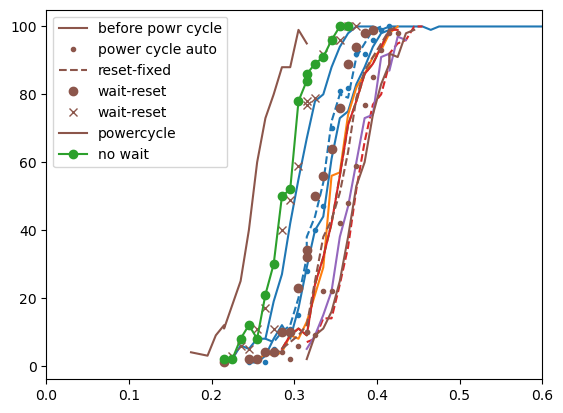

In [33]:
#for i, r in enumerate(ret):
i = 0
plt.plot(scurves[i][0], scurves[i][1], 'C0-')
plt.plot(scurves_auto[i][0], scurves_auto[i][1], 'C0.')
plt.plot(scurves_3s[i][0], scurves_3s[i][1], 'C0--')
plt.plot(scurves1[i][0], scurves1[i][1], 'C0-')
plt.plot(scurves2[i][0], scurves2[i][1], 'C1-')
plt.plot(scurves3[i][0], scurves3[i][1], 'C2--')
plt.plot(scurvesNone[i][0], scurvesNone[i][1], 'C3-')
plt.plot(scurvesNoneAuto[i][0], scurvesNoneAuto[i][1], 'C3--')
plt.plot(scurvesNoneAuto2[i][0], scurvesNoneAuto2[i][1], 'C4-')
plt.plot(scurvesNoneAuto3[i][0], scurvesNoneAuto3[i][1], 'C5-', label='before powr cycle')
plt.plot(scurvespw[i][0], scurvespw[i][1], 'C5.', label='power cycle auto')
plt.plot(scurves4[i][0], scurves4[i][1], 'C5--', label='reset-fixed')
plt.plot(scurves5[i][0], scurves5[i][1], 'C5o', label='wait-reset')
plt.plot(scurves6[i][0], scurves6[i][1], 'C5x', label='wait-reset')
plt.plot(scurves7[i][0], scurves7[i][1], 'C5-', label='powercycle')
plt.plot(scurves8[i][0], scurves8[i][1], 'C2-o', label='no wait')
plt.legend()
plt.xlim(0,0.6)

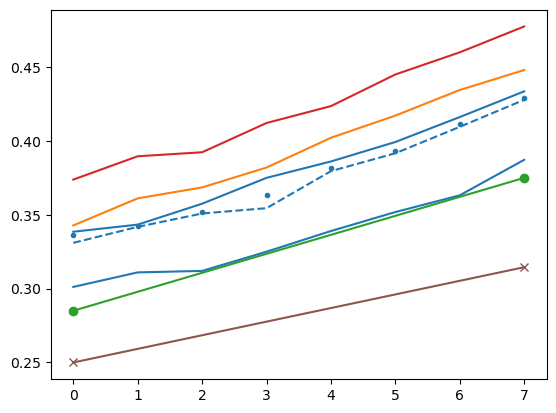

In [34]:
plt.plot(ret['tdac'], ret['quick_th'], 'C0-')
plt.plot(ret_auto['tdac'], ret_auto['quick_th'], 'C0.')
plt.plot(ret_3s['tdac'], ret_3s['quick_th'], 'C0--')
plt.plot(ret1['tdac'], ret1['quick_th'], 'C0-')
plt.plot(ret2['tdac'], ret2['quick_th'], 'C1-')
plt.plot(retNoneAuto['tdac'], retNoneAuto['quick_th'], 'C3')
plt.plot(ret7['tdac'], ret7['quick_th'], 'C5x-')
plt.plot(ret8['tdac'], ret8['quick_th'], 'C2o-')
#plt.plot(scurves3[i][0], scurves3[i][1], 'C2--')
#plt.plot(scurvesNone[i][0], scurvesNone[i][1], 'C3-')
## auto
